
## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load data

In [2]:
static_data = pd.read_csv('C:/Users/Welcome/OneDrive/Desktop/uottawa/Second Term/AI foe CS/Assignments/A3/Env/data/Static_dataset.csv')
print(static_data.columns)

Index(['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower',
       'numeric', 'entropy', 'special', 'labels', 'labels_max',
       'labels_average', 'longest_word', 'sld', 'len', 'subdomain',
       'Target Attack'],
      dtype='object')


## EDA

In [3]:
static_data.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [4]:
static_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

In [5]:
print(len(static_data['longest_word'].unique()))  #printing the number of unique values in the longest_word column
print(len(static_data['sld'].unique()))           #printing the number of unique values in the sld column

6225
11112


In [6]:
# check for dubplicates
print(static_data.duplicated().sum())
#drop duplicates
static_data.drop_duplicates(inplace=True)

91803


## Preprocessing

### nuls

In [7]:
# print(static_data.isnull().sum())
static_data.dropna(inplace=True)

## feature engineering

In [8]:
# transform timestamp to time in seconds
#split minutes from timestamp with :
static_data['timestamp'] = static_data['timestamp'].str.split(':')
static_data['minute'] = static_data['timestamp'].str[0]
static_data['second'] = static_data['timestamp'].str[1]
#split milisecond from second with .
static_data['second'] = static_data['second'].str.split('.')
static_data['second'] = static_data['second'].str[0]
static_data['milisecond'] = static_data['second'].str[1]
#make columns minutes, seconds and millisec integer
static_data['minute'] = static_data['minute'].astype(int)
static_data['second'] = static_data['second'].astype(int)
static_data['milisecond'] = static_data['milisecond'].astype(int) 
static_data['time'] = static_data['minute']*60 + static_data['second'] + static_data['milisecond']/1000
static_data.drop( columns = ['timestamp','minute','second','milisecond'], inplace = True)
static_data.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack,time
0,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1,3379.009
1,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1,443.003
2,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0,1395.005
3,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1,291.001
4,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1,764.004


## hashing object columns

In [9]:
# hash the longest_word and sld columns 
from sklearn.preprocessing import MinMaxScaler
static_data['longest_word'] = static_data['longest_word'].apply(lambda x: hash(x))
static_data['sld'] = static_data['sld'].apply(lambda x: hash(x))

## scale all the columns except the target column
scaler = MinMaxScaler()
for col in static_data.columns:
    if col != 'Target Attack':
        static_data[[col]] = scaler.fit_transform(static_data[[col]])


static_data.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack,time
0,0.735294,0.434783,0.0,0.294118,0.916667,0.588151,0.857143,0.833333,0.166667,0.055556,0.893029,0.737285,0.387097,1.0,1,0.938872
1,0.735294,0.434783,0.0,0.294118,0.916667,0.637374,0.857143,0.833333,0.166667,0.055556,0.893029,0.737285,0.387097,1.0,1,0.123090
2,0.705882,0.391304,0.0,0.294118,0.833333,0.631156,0.857143,0.833333,0.166667,0.050000,0.893029,0.737285,0.354839,1.0,0,0.387608
3,0.735294,0.434783,0.0,0.294118,0.916667,0.588151,0.857143,0.833333,0.166667,0.055556,0.893029,0.737285,0.387097,1.0,1,0.080856
4,0.382353,0.391304,0.0,0.323529,0.000000,0.677959,0.571429,0.333333,0.100000,0.077778,0.737219,0.737329,0.419355,1.0,1,0.212282


## check data balance

C:\Users\Welcome\AppData\Local\Temp\ipykernel_16612\538302540.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target Attack',data=static_data, palette='hls')


<Axes: xlabel='Target Attack', ylabel='count'>

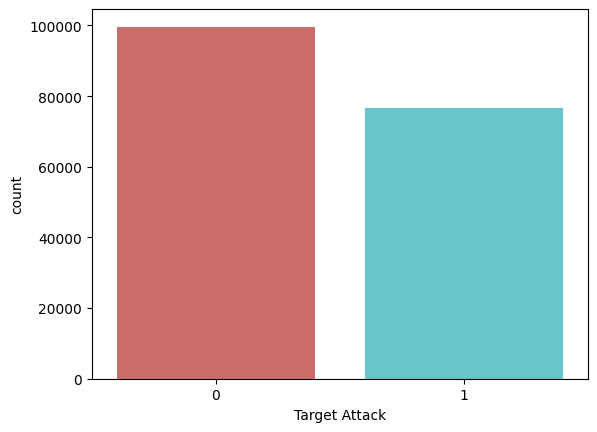

In [10]:
sns.countplot(x='Target Attack',data=static_data, palette='hls')

## data distribution

C:\Users\Welcome\AppData\Local\Temp\ipykernel_16612\2040427969.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]])
C:\Users\Welcome\AppData\Local\Temp\ipykernel_16612\2040427969.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]])
C:\Users\Welcome\App

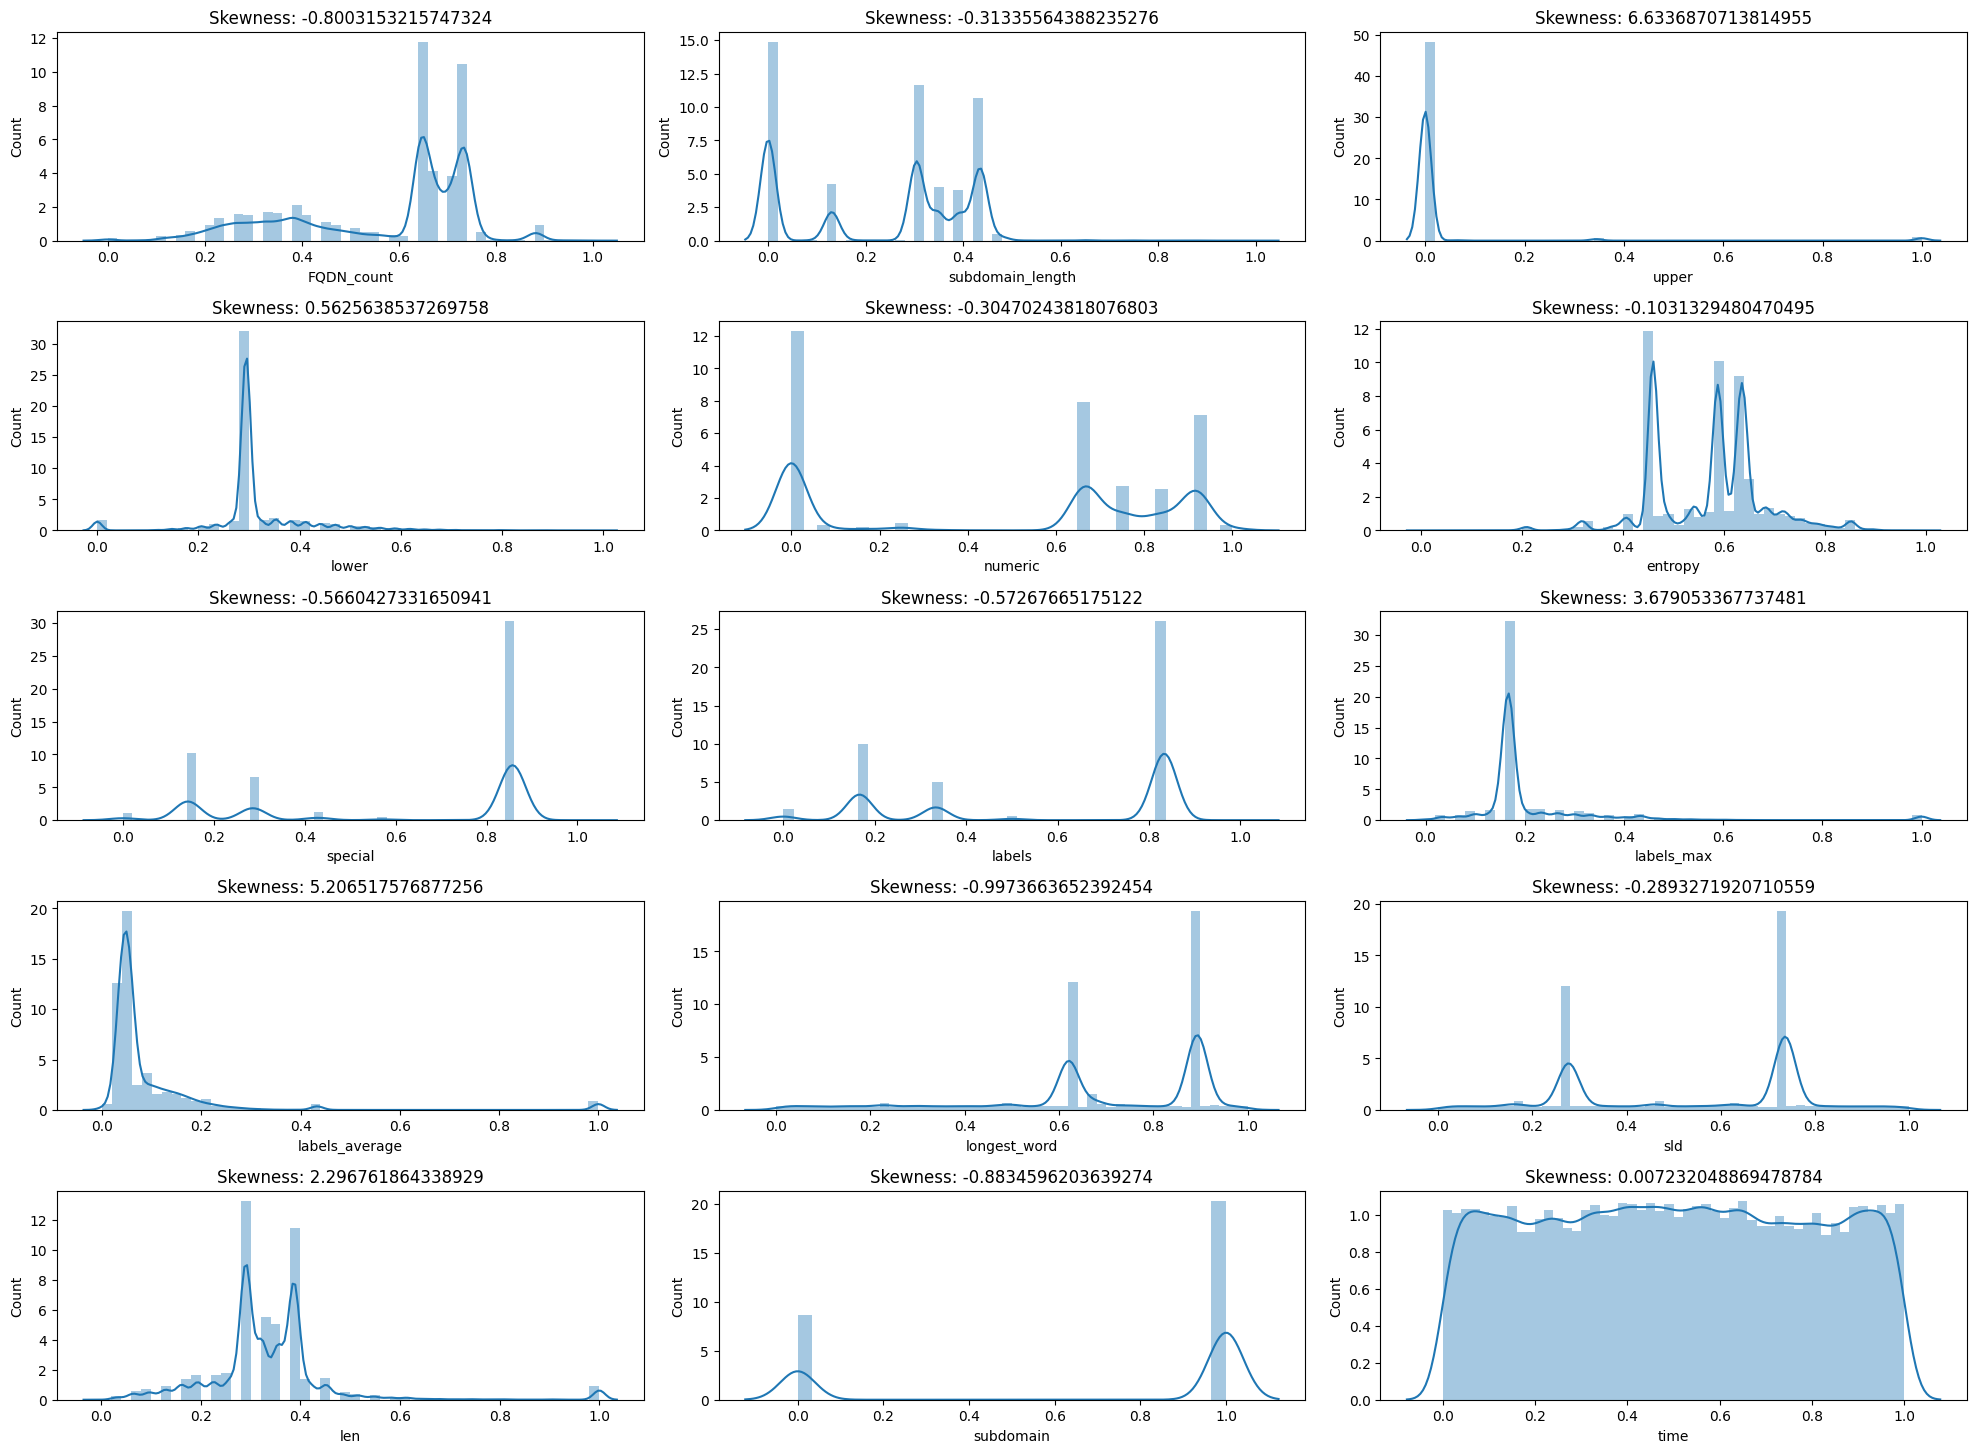

In [11]:
# check for skewness
def plot_distribution(data):
    fig = plt.figure(figsize=(20,20))
    for i in range(len(data.columns)):
        fig.add_subplot(7,3,i+1)
        sns.distplot(data[data.columns[i]])
        plt.xlabel(data.columns[i])
        plt.ylabel('Count')
        plt.title('Skewness: '+str(data[data.columns[i]].skew()))
    plt.tight_layout()
    plt.show()

plot_distribution(static_data.drop(['Target Attack'],axis=1))

## Spliting data

In [12]:
#split the data into features and target
X = static_data.drop('Target Attack', axis=1)
y = static_data['Target Attack']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

## XGBoost for all data

              precision    recall  f1-score   support

           0       1.00      0.63      0.77     19930
           1       0.67      1.00      0.80     15323

    accuracy                           0.79     35253
   macro avg       0.84      0.81      0.79     35253
weighted avg       0.86      0.79      0.79     35253

 f1 score: 0.788088230258617


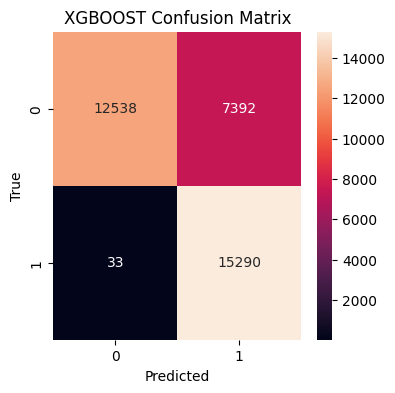

In [13]:
# use xgboost
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)


#check thwe performance of the model
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
xgb_f1 = f1_score(y_test, predictions, average='macro')
print(f" f1 score: {xgb_f1}")
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.0f')
plt.title('XGBOOST Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## random forest for all data

              precision    recall  f1-score   support

           0       0.86      0.67      0.76     19930
           1       0.67      0.86      0.75     15323

    accuracy                           0.76     35253
   macro avg       0.77      0.77      0.76     35253
weighted avg       0.78      0.76      0.76     35253



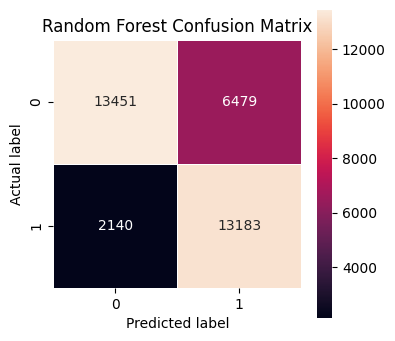

 f1 score: 0.7554960386586913


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test,rf_pred))
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Random Forest Confusion Matrix")
plt.show()
rf_f1 = f1_score(y_test, rf_pred, average='macro')
print(f" f1 score: {rf_f1}")

## Heat map

<Axes: >

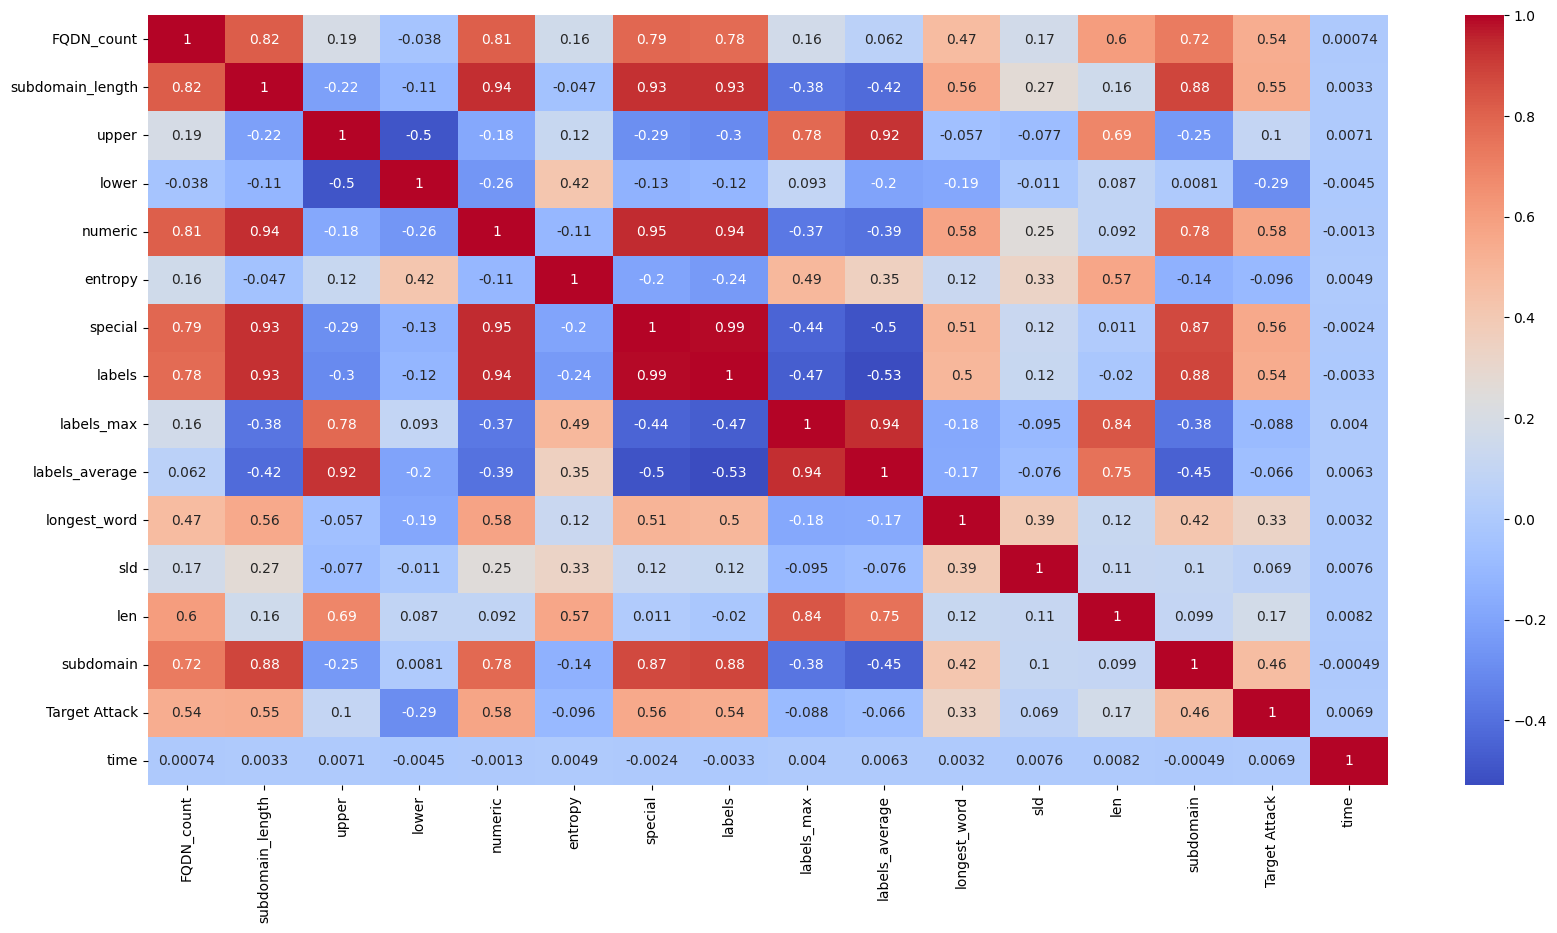

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(static_data.corr(), annot=True, cmap='coolwarm')

In [16]:
# select the features with correlation greater than or equal 0.1 and less than or equal -0.1
corr = static_data.corr()
corr_features = corr.index[(corr['Target Attack'] >= 0.1) | (corr['Target Attack'] <= -0.1)]
corr_features = corr_features.drop('Target Attack')
print(corr_features)
print(len(corr_features))

Index(['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric',
       'special', 'labels', 'longest_word', 'len', 'subdomain'],
      dtype='object')
10


### XGBoost for heat map

In [17]:
# use xgboost
heat_map_df = static_data[corr_features]
X = heat_map_df
y = static_data['Target Attack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)

#check the performance of the model
print(classification_report(y_test,predictions))
xgb_f1_htmap = f1_score(y_test, predictions, average='macro')
print(f" f1 score: {xgb_f1_htmap}")


              precision    recall  f1-score   support

           0       1.00      0.63      0.77     19930
           1       0.67      1.00      0.80     15323

    accuracy                           0.79     35253
   macro avg       0.84      0.81      0.79     35253
weighted avg       0.86      0.79      0.79     35253

 f1 score: 0.7874957013403993


### random forest with the best features from heat map

              precision    recall  f1-score   support

           0       1.00      0.63      0.77     19930
           1       0.67      1.00      0.80     15323

    accuracy                           0.79     35253
   macro avg       0.84      0.81      0.79     35253
weighted avg       0.86      0.79      0.79     35253



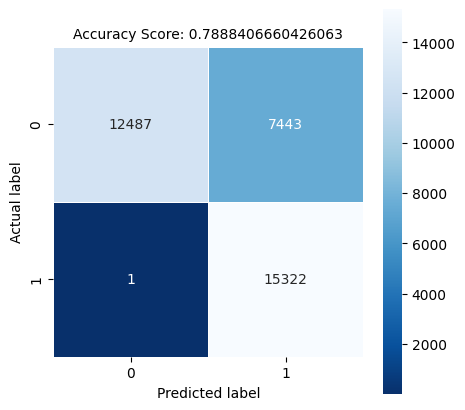

 f1 score: 0.7874661746531397


In [18]:
# apply random forest classifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)


#check the performance of the model
print(classification_report(y_test,rf_pred))
RF_acc_htmap = rf.score(X_test,y_test)
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f"Accuracy Score: {RF_acc_htmap}", size = 10)
plt.show()

print(f" f1 score: {f1_score(y_test, rf_pred, average='macro')}")


## ANOVA

In [19]:
# try the ANOVA F-value method to select the best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# make a function to use it later
def anova_function(model,X_train,y_train,X_test,y_test,m):
    f1_scores = []
    n_features = X.shape[1]
    for i in range(1,n_features-1):
        selector = SelectKBest(f_classif, k=i)
        selector.fit(X_train, y_train)
        X_train_anova = selector.transform(X_train)
        X_test_anova = selector.transform(X_test)
        model.fit(X_train_anova,y_train)
        predictions = model.predict(X_test_anova)
        f1_scores.append(f1_score(y_test, predictions, average='macro'))
    plt.figure(figsize=(10,6))
    plt.plot(range(1,n_features-1),f1_scores,marker='o',linestyle='-',color='b',label='F1 score')
    plt.axhline(y= xgb_f1, color='red', linestyle='--', label = 'xgboost f1 score without ANOVA F-value method')
    plt.axhline(y=rf_f1, color='green', linestyle='--', label = 'random forest f1 score without ANOVA F-value method')
    plt.title(f'F1 score of {m} vs Number of features')
    plt.xlabel('Number of features')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    return max(f1_scores), f1_scores.index(max(f1_scores))+1

### XGBoost for ANOVA

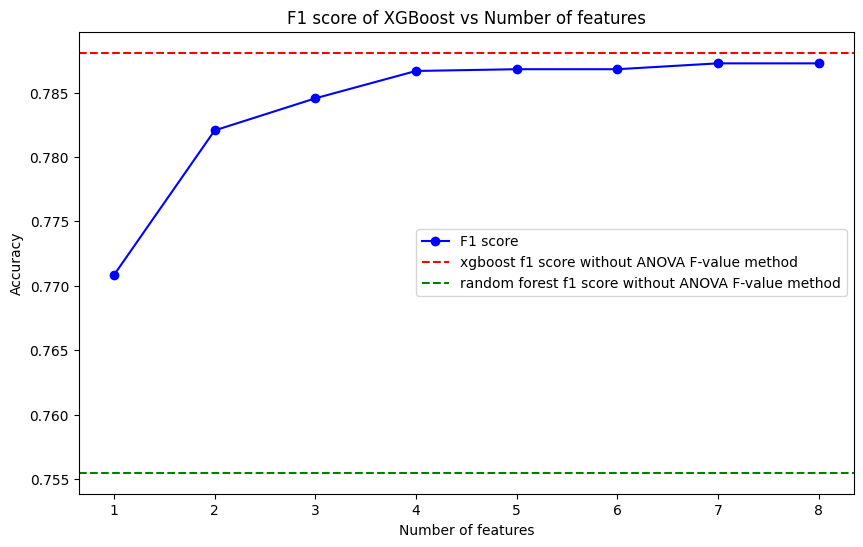

XGBoost max f1 score with ANOVA F-value method: 0.7872633852265255 and best number of features: 7


In [20]:
# use xgboost
xgb = XGBClassifier(random_state=42)
xgb_max_f1_anova, xgb_best_nfeat_anova = anova_function(xgb,X_train,y_train,X_test,y_test,'XGBoost')
print(f'XGBoost max f1 score with ANOVA F-value method: {xgb_max_f1_anova} and best number of features: {xgb_best_nfeat_anova}')

### Random Forest with ANOVA

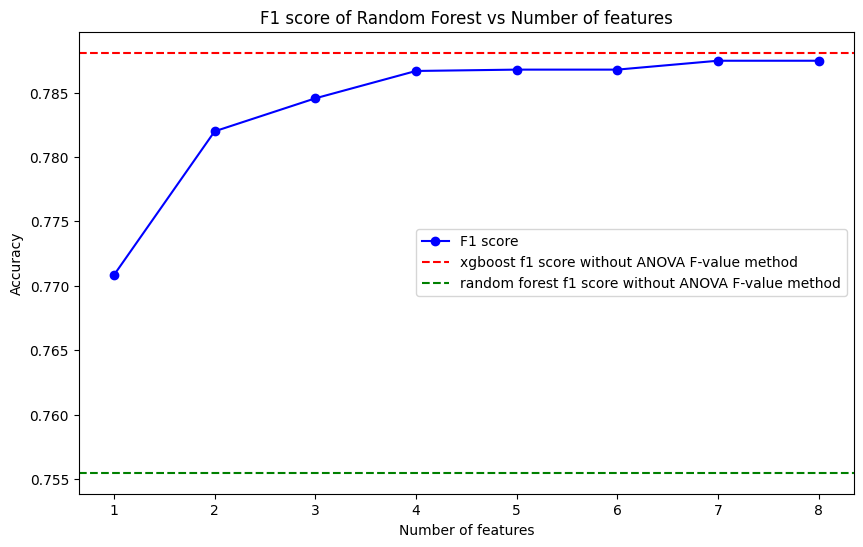

Random Forest max max f1 score with ANOVA F-value method: 0.7874661746531397 and best number of features: 7


In [21]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf_max_f1_anova, rf_best_nfeat_anova = anova_function(rf,X_train,y_train,X_test,y_test,'Random Forest')
print(f'Random Forest max max f1 score with ANOVA F-value method: {rf_max_f1_anova} and best number of features: {rf_best_nfeat_anova}')


In [22]:
# print all results
print(f'XGBoost max f1 score without ANOVA F-value method:       {xgb_f1}')
print(f'Random Forest max f1 score without ANOVA F-value method: {rf_f1}')
# with heatmap
print(f'XGBoost max f1 score with heatmap:                       {xgb_f1_htmap}')
print(f'Random Forest max f1 score with heatmap:                 {f1_score(y_test, rf_pred, average="macro")}')
print(f'XGBoost max f1 score with ANOVA F-value method:          {xgb_max_f1_anova}')
print(f'Random Forest max f1 score with ANOVA F-value method:    {rf_max_f1_anova}')

# print the max f1 score and the best number of features of all results
print(f'XGBoost max f1 score: {max(xgb_f1,xgb_f1_htmap,xgb_max_f1_anova)} and best number of features: {xgb_best_nfeat_anova}')
print(f'Random Forest max f1 score: {max(rf_f1,f1_score(y_test, rf_pred, average="macro"),rf_max_f1_anova)} and best number of features: {rf_best_nfeat_anova}')


XGBoost max f1 score without ANOVA F-value method:       0.788088230258617
Random Forest max f1 score without ANOVA F-value method: 0.7554960386586913
XGBoost max f1 score with heatmap:                       0.7874957013403993
Random Forest max f1 score with heatmap:                 0.7874661746531397
XGBoost max f1 score with ANOVA F-value method:          0.7872633852265255
Random Forest max f1 score with ANOVA F-value method:    0.7874661746531397
XGBoost max f1 score: 0.788088230258617 and best number of features: 7
Random Forest max f1 score: 0.7874661746531397 and best number of features: 7


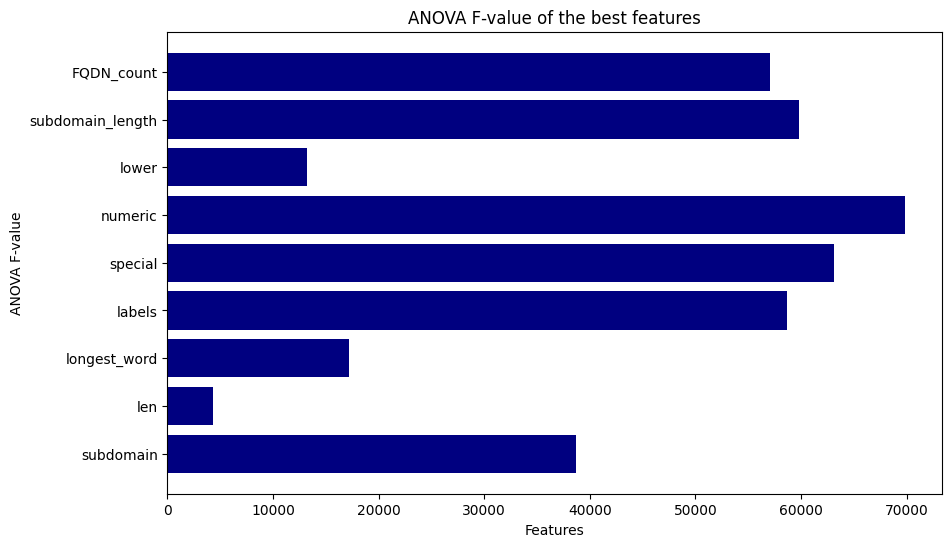

In [23]:
# get the names of the best features
selector = SelectKBest(f_classif, k=9)
selector.fit(X_train, y_train)
X_train_anova = selector.transform(X_train)
X_test_anova = selector.transform(X_test)
new_features = X.columns[selector.get_support(indices=True)]

plt.figure(figsize=(10,6))
plt.barh(new_features,selector.scores_[selector.get_support(indices=True)],color='navy')
plt.xlabel('Features')
plt.ylabel('ANOVA F-value')
plt.title('ANOVA F-value of the best features')
plt.gca().invert_yaxis()
plt.show()



In [29]:
new_features

Index(['FQDN_count', 'subdomain_length', 'lower', 'numeric', 'special',
       'labels', 'longest_word', 'len', 'subdomain'],
      dtype='object')

### Grid Search

In [24]:
# # apply grid search to find the best parameters and return the best parameters
# from sklearn.model_selection import GridSearchCV

# def grid_search(model,parameters,X_train,y_train,X_test,y_test):
#     grid = GridSearchCV(model,parameters,refit=True,verbose=3)
#     grid.fit(X_train,y_train)
#     print(grid.best_params_)
#     print(grid.best_estimator_)
#     predictions = grid.predict(X_test)
#     print(classification_report(y_test,predictions))
#     return grid.best_params_

# model = XGBClassifier()
# parameters = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000],'learning_rate':[0.001,0.01,0.1,0.2,0.3]}
# best_params = grid_search(model,parameters,X_train_anova,y_train,X_test_anova,y_test)

# # use the best parameters to train the model
# xgb = XGBClassifier(n_estimators=best_params['n_estimators'],learning_rate=best_params['learning_rate'])

In [25]:
# best_params    # {'learning_rate': 0.1, 'n_estimators': 400}

## save model

In [26]:
model = XGBClassifier(learning_rate=0.1,n_estimators=400)

### Saving the model

In [27]:
# save the pipeline with the scaler, chosen features and the model
scaler = MinMaxScaler()
static_data_final = pd.read_csv('C:/Users/Welcome/OneDrive/Desktop/uottawa/Second Term/AI foe CS/Assignments/A3/Env/data/Static_dataset.csv')
static_data_final.dropna(inplace=True)
static_data_final.drop_duplicates(inplace=True)
static_data_final['longest_word'] = static_data_final['longest_word'].apply(lambda x: hash(x))
X_train_final = static_data_final[new_features]
y_train_final = static_data_final['Target Attack']
import pickle
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler',scaler),
                 ('model',model)])
pipe.fit(X_train_final,y_train_final)
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [28]:
f1_score(y_train_final, pipe.predict(X_train_final), average='macro')

0.786700560863427